In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [33]:
crime = pd.read_csv('/Users/Allison/desktop/sfdat22/notebooks/train.csv')

In [55]:
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour
Dates,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23


In [92]:
crime['Year'] = crime.index.year
crime['Month'] = crime.index.month
crime['Day'] = crime.index.dayofweek
crime['Hour'] = crime.index.hour
crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Day
Dates,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,2
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,2
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23,2
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23,2
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23,2


In [43]:
# crime["Dates"] = pd.to_datetime(crime["Dates"])
# crime.set_index("Dates", inplace=True)

# crime['Year'] = crime.index.year

#data.head()

In [44]:
crime.tail(2)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour
Dates,,,,,,,,,,,
2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,0
2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212,2003,1,0


In [45]:
crime.shape

(878049, 11)

In [46]:
crime.isnull().sum()

Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Year          0
Month         0
Hour          0
dtype: int64

In [52]:
crime.Hour.value_counts()

18    55104
17    53553
12    51934
16    50137
19    49475
15    48058
22    45741
0     44865
20    44694
14    44424
21    43661
13    43145
23    42460
11    38373
10    37806
9     35555
8     32900
1     26173
2     22296
7     22048
3     14014
6     13133
4      9863
5      8637
Name: Hour, dtype: int64

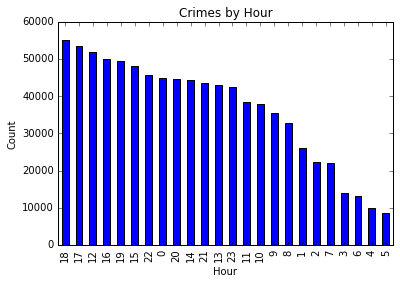

In [56]:
crime.Hour.value_counts().plot(kind='bar', title='Crimes by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')

In [57]:
crime.Category.describe()

count            878049
unique               39
top       LARCENY/THEFT
freq             174900
Name: Category, dtype: object

In [94]:
crime.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [12]:
crime.groupby('DayOfWeek').PdDistrict.value_counts()

DayOfWeek  PdDistrict
Friday     SOUTHERN      24458
           MISSION       18190
           NORTHERN      16331
           BAYVIEW       13681
           CENTRAL       13397
           INGLESIDE     11881
           TENDERLOIN    11129
           TARAVAL       10207
           PARK           7610
           RICHMOND       6850
Monday     SOUTHERN      21184
           MISSION       16587
           NORTHERN      14300
           BAYVIEW       12649
           TENDERLOIN    11898
           INGLESIDE     11282
           CENTRAL       11130
           TARAVAL        9257
           PARK           6945
           RICHMOND       6352
Saturday   SOUTHERN      23277
           MISSION       17213
           NORTHERN      15487
           CENTRAL       14067
           BAYVIEW       12440
           TENDERLOIN    11110
           INGLESIDE     10845
           TARAVAL        9024
           PARK           6913
           RICHMOND       6434
                         ...  
Thursday   SOUTHE

In [96]:
crime[['PdDistrict', 'Hour']][crime.Category=='PROSTITUTION']

,PdDistrict,Hour
Dates,,
2015-05-12 19:44:00,RICHMOND,19
2015-05-11 12:00:00,BAYVIEW,12
2015-04-30 23:55:00,NORTHERN,23
2015-04-30 23:55:00,NORTHERN,23
2015-04-30 23:00:00,NORTHERN,23
2015-04-30 23:00:00,NORTHERN,23
2015-04-30 20:22:00,NORTHERN,20
2015-04-30 20:22:00,NORTHERN,20
2015-04-30 19:51:00,NORTHERN,19


In [75]:
new_crimes = crime[['X', 'Y']]
new_crimes.head()

,X,Y
Dates,,
2015-05-13 23:53:00,-122.425892,37.774599
2015-05-13 23:53:00,-122.425892,37.774599
2015-05-13 23:33:00,-122.424363,37.800414
2015-05-13 23:30:00,-122.426995,37.800873
2015-05-13 23:30:00,-122.438738,37.771541


In [79]:
X, y = new_crimes[['X','Y']], crime['Category']
print X.shape
print y.shape

(878049, 2)
(878049,)


In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.score(X, y)

0.2224556943860764

In [87]:
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.20390889346722108, 0.21424089088422171, 0.2224556943860764, 0.2359879687807856, 0.24970246535216145, 0.26024515716093294, 0.26615826679376664, 0.2765107642056423, 0.28146151296795507, 0.28234984607920516, 0.28637012285191371, 0.28794748356868466, 0.28963189981424725, 0.29232764914030995, 0.29258845463066413, 0.29301667674583082, 0.29422731533206004, 0.29528989839974762, 0.29534228727553929, 0.29626250926770603, 0.29634678702441436, 0.29594362045853934, 0.29593906490412264, 0.29633653702697688, 0.29709959239176859, 0.29815761990503947, 0.29797084217395614, 0.29851523092674781, 0.29808928658878947]


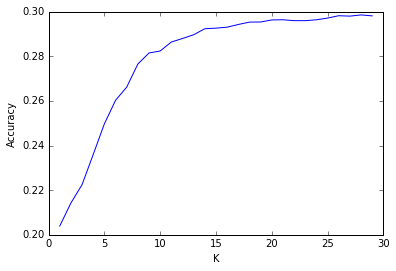

In [88]:
plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")